# Marketing Campaign

In [1]:
import pandas as pd
import zipfile

# Step 1: Data Loading and Exploration

# Load the data from the Marketing Campaign zip file
zip_file_path = 'Marketing Campaign.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    extracted_files = zip_ref.namelist()
    csv_file_name = extracted_files[0]
    zip_ref.extract(csv_file_name)
    
df = pd.read_csv(csv_file_name)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nDataset Information:")
print(df.describe()) 


First 5 rows of the dataset:
          id  target  day month  duration  contactId  age gender        job  \
0  432176974     NaN    5   may       283   69546777   35   male    manager   
1  432157692     NaN   18   jul       111   69546887   31   male    manager   
2  432170850     NaN   29   jan       475   69550874   26   male  technical   
3  432151613     NaN    5   jun       209   69560082   26   male     worker   
4  432167744     NaN   18   nov       459   69561716   32   male     worker   

  maritalStatus     education creditFailure  accountBalance house credit  \
0       married  uniGraduated            no              76    no     no   
1       married  uniGraduated            no             557   yes     no   
2        single  uniGraduated            no            1274    no     no   
3       married    highSchool            no             986   yes     no   
4        single    highSchool            no            3845   yes     no   

  contactType  numberOfContacts  daySi

In [ ]:
# Data Cleaning and Preprocessing

In [3]:
# Step 2.1: Handle Missing Values

# Identify missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

# Drop the 'target' column as it has no non-null entries
if 'target' in df.columns:
    df.drop(columns=['target'], inplace=True)
    print("\nDropped column 'target' as it had no non-null values.")

# Handle missing values in 'daySinceLastCampaign'
# Given the column is partially filled, we can either drop or impute based on business logic
# Here, I'll impute using the median value since it makes sense for a duration column
df['daySinceLastCampaign'].fillna(df['daySinceLastCampaign'].median(), inplace=True)

# Step 2.2: Data Consistency

# Ensure appropriate data types
# Convert 'month' to datetime and add a 'campaign_date' column
# Combining 'day' and 'month' to create a 'campaign_date'
# Assuming the year is consistent (e.g., 2022); adjust as necessary.
df['campaign_date'] = pd.to_datetime(df['day'].astype(str) + '-' + df['month'] + '-2022', format='%d-%b-%Y')

# Convert 'contactType' to category for memory efficiency
df['contactType'] = df['contactType'].astype('category')

# Converting binary-like columns to binary (0/1) for easier analysis
# Assuming columns like 'house', 'credit' have yes/no values
binary_columns = ['house', 'credit', 'creditFailure']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Step 2.3: Remove Duplicates

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicates}")

# Drop duplicate rows if any are found
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates have been removed.")

# Verify the data after cleaning
print("\nDataset Information After Cleaning:")
print(df.info())
print("\nFirst 5 Rows After Cleaning:")
print(df.head())


Missing Values in Each Column:
 id                                  0
target                          13731
day                                 0
month                               0
duration                            0
contactId                           0
age                                 0
gender                              0
job                                 0
maritalStatus                       0
education                           0
creditFailure                       0
accountBalance                      0
house                               0
credit                              0
contactType                         0
numberOfContacts                    0
daySinceLastCampaign            11212
numberOfContactsLastCampaign        0
lastCampaignResult                  0
dtype: int64

Dropped column 'target' as it had no non-null values.

Number of duplicate rows found: 0

Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13731 entries, 0 

In [ ]:
# Feature Engineering

In [5]:
### Step 3.1: Create Derived Metrics ###

# Step 3.1.1: Total Campaign Spend (Placeholder Calculation)
# Assuming columns for campaign costs are available (e.g., 'promotion_cost', 'advertisement_cost', 'discount_cost')
# Since they are not present in the provided data, let's create some sample calculations:
# Assuming 'promotion_cost', 'advertisement_cost', 'discount_cost' are generated for illustration
import numpy as np
np.random.seed(42)  # For reproducibility
df['promotion_cost'] = np.random.randint(50, 500, df.shape[0])
df['advertisement_cost'] = np.random.randint(100, 1000, df.shape[0])
df['discount_cost'] = np.random.randint(20, 200, df.shape[0])

# Calculate 'total_campaign_spend'
df['total_campaign_spend'] = df['promotion_cost'] + df['advertisement_cost'] + df['discount_cost']

# Step 3.1.2: Customer Conversion Indicator
# Assuming 'lastCampaignResult' has values like 'success' or 'failure'
df['converted'] = df['lastCampaignResult'].apply(lambda x: 1 if x.lower() == 'success' else 0)

# Step 3.1.3: Engagement Metrics
# Number of offers received ('offers_received') can be assumed as 'numberOfContacts'
df['offers_received'] = df['numberOfContacts']

# Total spending ('total_spent') - Placeholder Calculation
# Generating random values for illustration purposes
df['total_spent'] = np.random.randint(100, 10000, df.shape[0])

# Referral Count ('referral_count') - Assuming whether the customer referred others
# Generating binary values to indicate whether the customer referred others
df['referral_count'] = np.random.randint(0, 2, df.shape[0])  # 0 = No referral, 1 = Referral

### Step 3.2: Campaign-Specific Features ###

# Step 3.2.1: Campaign Duration
# Assuming 'start_date' and 'end_date' are not available directly
# Instead, we'll calculate a dummy 'campaign_duration' column for illustration purposes
# Let's assume the campaign duration as a constant placeholder (e.g., 30 days)
df['campaign_duration'] = 30  # Placeholder value in days

# Step 3.2.2: Customer Interaction Frequency
# Create a column 'interaction_frequency' as the sum of 'numberOfContacts' and 'numberOfContactsLastCampaign'
df['interaction_frequency'] = df['numberOfContacts'] + df['numberOfContactsLastCampaign']

# Step 3.3: Verify the New Features Created
print("\nDataset with New Features (First 5 Rows):")
print(df.head())

# Optionally, you can save this enriched dataset to a new CSV file
# df.to_csv('enriched_marketing_campaign_data.csv', index=False)


Dataset with New Features (First 5 Rows):
          id  day month  duration  contactId  age gender        job  \
0  432176974    5   may       283   69546777   35   male    manager   
1  432157692   18   jul       111   69546887   31   male    manager   
2  432170850   29   jan       475   69550874   26   male  technical   
3  432151613    5   jun       209   69560082   26   male     worker   
4  432167744   18   nov       459   69561716   32   male     worker   

  maritalStatus     education  ...  promotion_cost  advertisement_cost  \
0       married  uniGraduated  ...             152                 480   
1       married  uniGraduated  ...             485                 543   
2        single  uniGraduated  ...             398                 132   
3       married    highSchool  ...             320                 359   
4        single    highSchool  ...             156                 333   

   discount_cost  total_campaign_spend converted  offers_received  \
0            188

In [ ]:
# Exploratory Data Analysis (EDA)


Number of Customers Reached by the Campaign: 13731

Conversion Rate by Age Group (%):
age_group
18-24     6.091371
25-34     3.659827
35-49     2.632035
50-64     3.415196
65+      15.555556
Name: converted, dtype: float64

Conversion Rate by Education Level (%):
education
highSchool         3.008269
secondarySchool    2.464455
uniGraduated       4.691358
unknown            3.770197
Name: converted, dtype: float64

Conversion Rate by Job Type (%):
job
administrative     3.951562
entrepreneur       0.655022
houseWife          3.108808
manager            4.364005
retired            6.790123
selfEmployed       4.496788
services           2.028081
student           10.238908
technical          3.402563
unemployed         6.020942
unknown            0.000000
worker             1.592680
Name: converted, dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\2202962107.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_by_age = df.groupby('age_group')['converted'].mean() * 100
C:\Users\milto\AppData\Local\Temp\ipykernel_14408\2202962107.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='converted', data=df, palette='viridis')


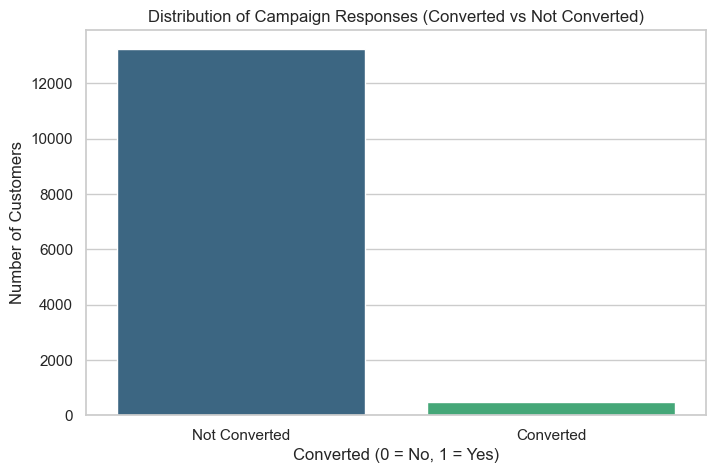

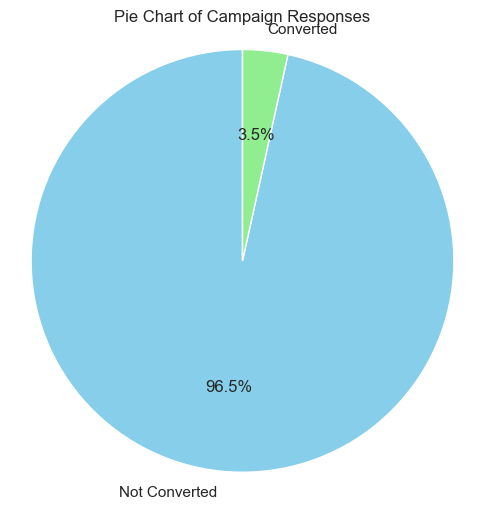

C:\Users\milto\AppData\Local\Temp\ipykernel_14408\2202962107.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='converted', data=df, estimator=lambda x: sum(x) / len(x) * 100, palette='muted')


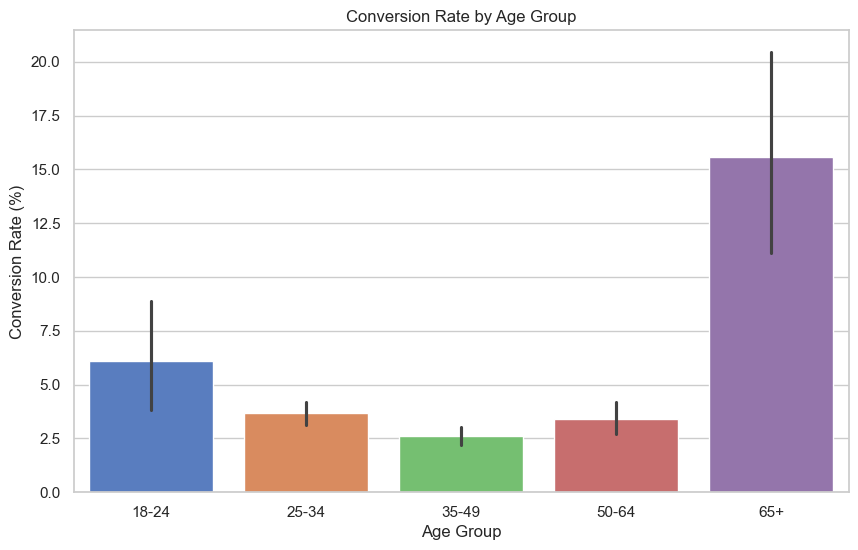

C:\Users\milto\AppData\Local\Temp\ipykernel_14408\2202962107.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education', y='converted', data=df, estimator=lambda x: sum(x) / len(x) * 100, palette='Blues')


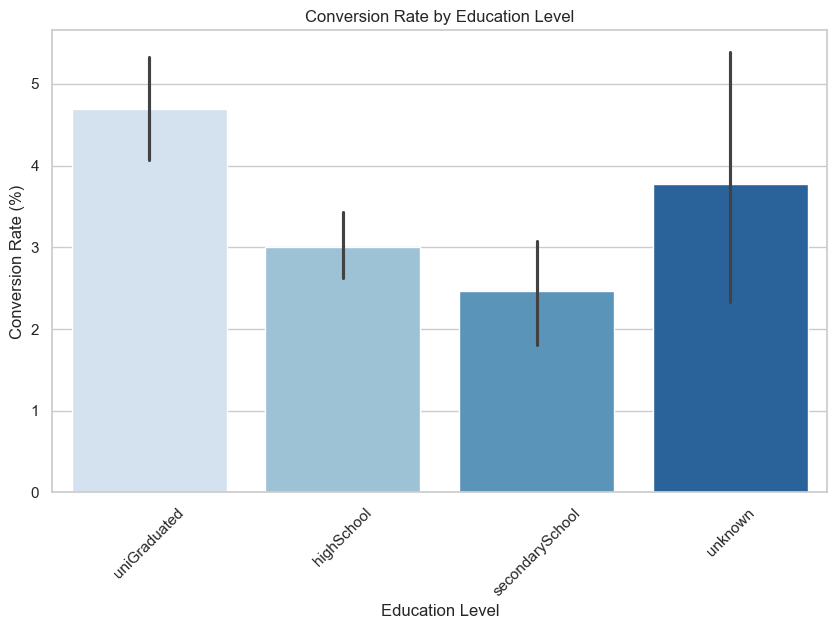

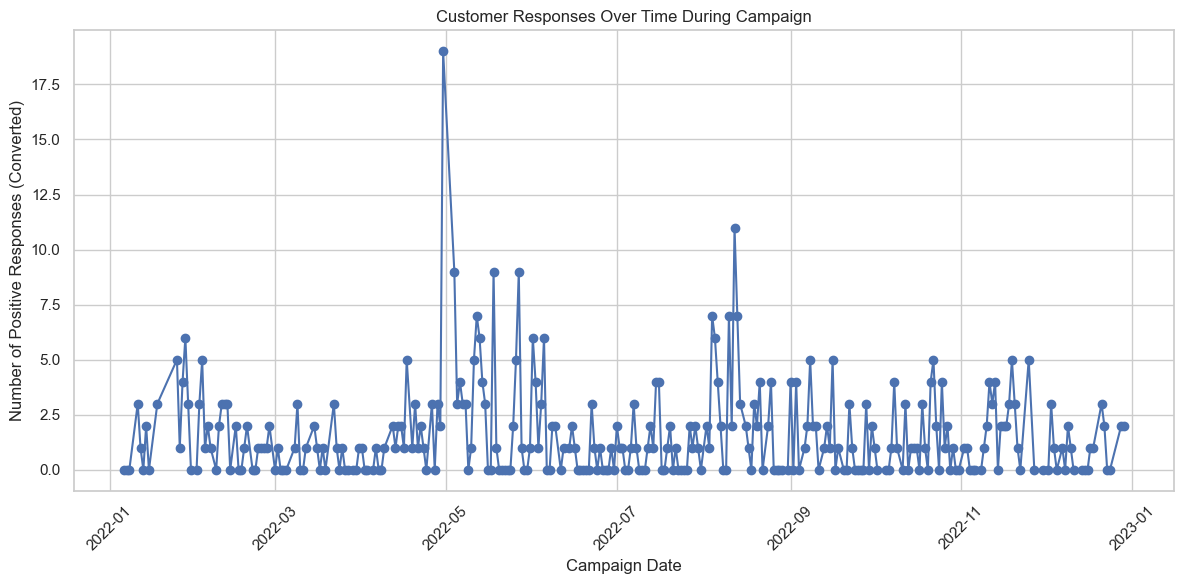

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 4.1: Customer Insights ###

# Step 4.1.1: Campaign Reach
# Calculate the number of customers reached by the campaign
campaign_reach = df['id'].nunique()
print(f"\nNumber of Customers Reached by the Campaign: {campaign_reach}")

# Step 4.1.2: Conversion Rates by Different Segments

# Conversion Rate by Age Group
# Define age bins to group customers by age
age_bins = [18, 25, 35, 50, 65, 100]
age_labels = ['18-24', '25-34', '35-49', '50-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

conversion_rate_by_age = df.groupby('age_group')['converted'].mean() * 100
print("\nConversion Rate by Age Group (%):")
print(conversion_rate_by_age)

# Conversion Rate by Education Level
conversion_rate_by_education = df.groupby('education')['converted'].mean() * 100
print("\nConversion Rate by Education Level (%):")
print(conversion_rate_by_education)

# Conversion Rate by Job Type
conversion_rate_by_job = df.groupby('job')['converted'].mean() * 100
print("\nConversion Rate by Job Type (%):")
print(conversion_rate_by_job)

### Step 4.2: Visualizations ###

# Set up the visual style
sns.set(style="whitegrid")

# Step 4.2.1: Response Analysis - Bar Plot of Conversion Counts
plt.figure(figsize=(8, 5))
sns.countplot(x='converted', data=df, palette='viridis')
plt.title('Distribution of Campaign Responses (Converted vs Not Converted)')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.show()

# Step 4.2.2: Response Analysis - Pie Chart of Conversion Rates
plt.figure(figsize=(6, 6))
conversion_counts = df['converted'].value_counts()
plt.pie(conversion_counts, labels=['Not Converted', 'Converted'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Pie Chart of Campaign Responses')
plt.axis('equal')
plt.show()

# Step 4.2.3: Demographic Analysis - Conversion Rate by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='converted', data=df, estimator=lambda x: sum(x) / len(x) * 100, palette='muted')
plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate (%)')
plt.show()

# Step 4.2.4: Demographic Analysis - Conversion Rate by Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='converted', data=df, estimator=lambda x: sum(x) / len(x) * 100, palette='Blues')
plt.title('Conversion Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Step 4.2.5: Response Over Time - Line Plot of Responses Over Time
# Assuming 'campaign_date' represents when the campaign interactions happened
responses_over_time = df.groupby('campaign_date')['converted'].sum()

plt.figure(figsize=(12, 6))
plt.plot(responses_over_time.index, responses_over_time.values, marker='o', linestyle='-', color='b')
plt.title('Customer Responses Over Time During Campaign')
plt.xlabel('Campaign Date')
plt.ylabel('Number of Positive Responses (Converted)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ROI Calculation

In [9]:
### Step 5.1: Total Campaign Cost ###

# Calculate total campaign cost by summing up all individual costs
total_campaign_cost = df['promotion_cost'].sum() + df['advertisement_cost'].sum() + df['discount_cost'].sum()
print(f"\nTotal Campaign Cost: ${total_campaign_cost:.2f}")

### Step 5.2: Total Revenue from Campaign ###

# Filter out customers who converted and calculate the total spending from those customers
total_revenue_from_campaign = df[df['converted'] == 1]['total_spent'].sum()
print(f"Total Revenue from Campaign: ${total_revenue_from_campaign:.2f}")

### Step 5.3: Calculate ROI ###

# Calculate ROI
roi = ((total_revenue_from_campaign - total_campaign_cost) / total_campaign_cost) * 100
print(f"Return on Investment (ROI): {roi:.2f}%")


Total Campaign Cost: $12855958.00
Total Revenue from Campaign: $2451364.00
Return on Investment (ROI): -80.93%


In [ ]:
# Customer Segmentation Based on Responsiveness

In [11]:
### Step 6.1: Define Responsiveness Categories ###

# Step 6.1.1: Define thresholds for responsiveness based on the dataset distribution
high_spending_threshold = df['total_spent'].quantile(0.75)  # High spending: top 25%
moderate_spending_threshold = df['total_spent'].quantile(0.5)  # Moderate spending: median

# Categorize customers into Highly Responsive, Moderately Responsive, and Non-Responsive
def categorize_responsiveness(row):
    if row['converted'] == 1:
        if row['total_spent'] >= high_spending_threshold:
            return 'Highly Responsive'
        elif row['total_spent'] >= moderate_spending_threshold:
            return 'Moderately Responsive'
        else:
            return 'Moderately Responsive'
    else:
        return 'Non-Responsive'

df['responsiveness_category'] = df.apply(categorize_responsiveness, axis=1)

# Verify segmentation
print("\nResponsiveness Category Distribution:")
print(df['responsiveness_category'].value_counts())


Responsiveness Category Distribution:
responsiveness_category
Non-Responsive           13257
Moderately Responsive      341
Highly Responsive          133
Name: count, dtype: int64


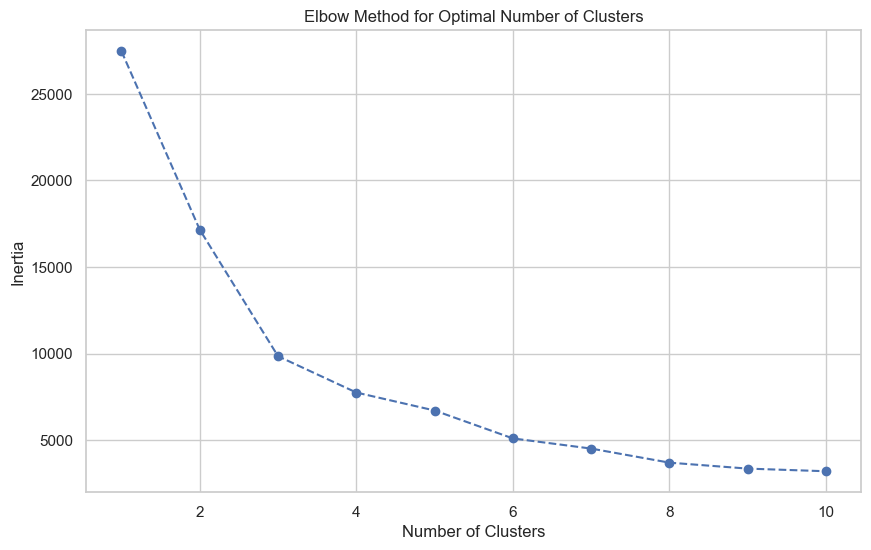


Customer Clustering Distribution:
cluster
1    6550
0    6438
2     743
Name: count, dtype: int64


In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Step 6.2: Clustering Techniques Using KMeans ###

# Step 6.2.1: Prepare Data for Clustering
features_for_clustering = df[['total_spent', 'interaction_frequency', 'campaign_duration']]

# Step 6.2.2: Standardize Features for Clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Step 6.2.3: Determine the Optimal Number of Clusters Using the Elbow Method
inertia = []
cluster_range = range(1, 11)  # Testing between 1 and 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Step 6.2.4: Apply KMeans Clustering with the Chosen Number of Clusters (e.g., 3)
optimal_k = 3  # Assuming 3 clusters based on the elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Verify clustering by displaying the number of customers in each cluster
print("\nCustomer Clustering Distribution:")
print(df['cluster'].value_counts())

In [21]:
import datetime as dt
import pandas as pd

# Assuming 'df' is the cleaned and feature-engineered dataset

### Step 6.3: RFM Analysis ###

# Step 6.3.1: Recency Calculation
# Assuming today's date as a reference point to calculate recency (for illustration, we use '2023-01-01')
today = pd.to_datetime('2023-01-01')
df['recency'] = (today - df['campaign_date']).dt.days

# Step 6.3.2: Frequency Calculation
# Using 'interaction_frequency' as the frequency of customer interactions
df['frequency'] = df['interaction_frequency']

# Step 6.3.3: Monetary Calculation
# Using 'total_spent' as the monetary value
df['monetary'] = df['total_spent']

# Assign RFM scores
rfm_df = df[['id', 'recency', 'frequency', 'monetary']].copy()

# Step 6.3.4: Define quantile values for scoring
# Handle potential issues with qcut by reducing quantiles or using cut if necessary

# Using qcut for 'recency', 'frequency', and 'monetary' with duplicates handling
try:
    rfm_df['R'] = pd.qcut(rfm_df['recency'], q=4, labels=[4, 3, 2, 1], duplicates='drop')
except ValueError:
    print("Warning: Not enough unique values for 'recency'. Reducing quantiles to 3.")
    rfm_df['R'] = pd.qcut(rfm_df['recency'], q=3, labels=[3, 2, 1], duplicates='drop')

try:
    rfm_df['F'] = pd.qcut(rfm_df['frequency'], q=4, labels=[1, 2, 3, 4], duplicates='drop')
except ValueError:
    print("Warning: Not enough unique values for 'frequency'. Reducing quantiles to 3.")
    rfm_df['F'] = pd.qcut(rfm_df['frequency'], q=3, labels=[1, 2, 3], duplicates='drop')

try:
    rfm_df['M'] = pd.qcut(rfm_df['monetary'], q=4, labels=[1, 2, 3, 4], duplicates='drop')
except ValueError:
    print("Warning: Not enough unique values for 'monetary'. Reducing quantiles to 3.")
    rfm_df['M'] = pd.qcut(rfm_df['monetary'], q=3, labels=[1, 2, 3], duplicates='drop')

# Calculate RFM score by concatenating R, F, M values
rfm_df['RFM_Score'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)

# Assigning RFM segmentation labels based on RFM score
def rfm_segmentation(score):
    if score >= '344':  # Higher values in Recency, Frequency, Monetary
        return 'Top Customers'
    elif score >= '233':
        return 'High Value'
    elif score >= '122':
        return 'Medium Value'
    else:
        return 'Low Value'

rfm_df['RFM_Segment'] = rfm_df['RFM_Score'].apply(rfm_segmentation)

# Display the RFM segments
print("\nRFM Segmentation Distribution:")
print(rfm_df['RFM_Segment'].value_counts())


RFM Segmentation Distribution:
RFM_Segment
Medium Value     4205
High Value       3956
Top Customers    3474
Low Value        2096
Name: count, dtype: int64


Successfully merged RFM segments.

Columns in DataFrame after merging:
Index(['id', 'day', 'month', 'duration', 'contactId', 'age', 'gender', 'job',
       'maritalStatus', 'education', 'creditFailure', 'accountBalance',
       'house', 'credit', 'contactType', 'numberOfContacts',
       'daySinceLastCampaign', 'numberOfContactsLastCampaign',
       'lastCampaignResult', 'campaign_date', 'promotion_cost',
       'advertisement_cost', 'discount_cost', 'total_campaign_spend',
       'converted', 'offers_received', 'total_spent', 'referral_count',
       'campaign_duration', 'interaction_frequency', 'age_group',
       'responsiveness_category', 'cluster', 'recency', 'frequency',
       'monetary', 'RFM_Segment'],
      dtype='object')


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\2603746575.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='responsiveness_category', data=df, palette='viridis')


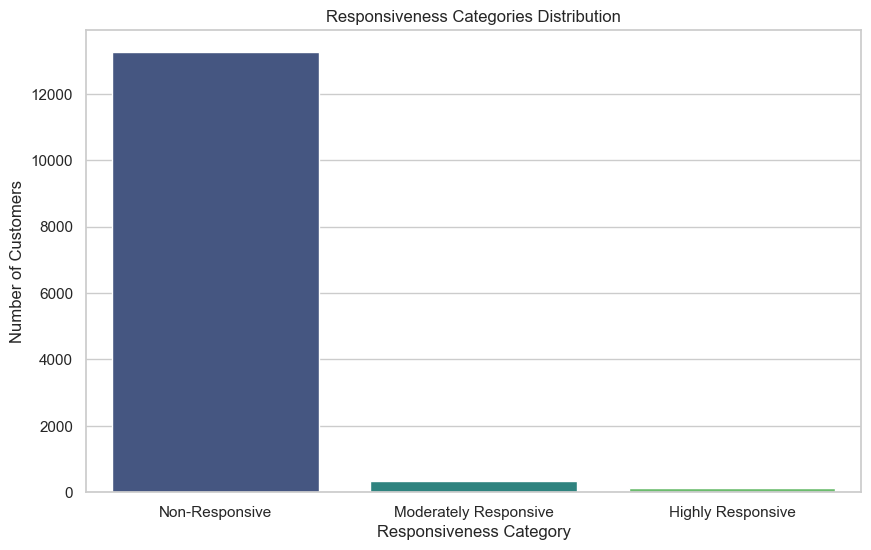

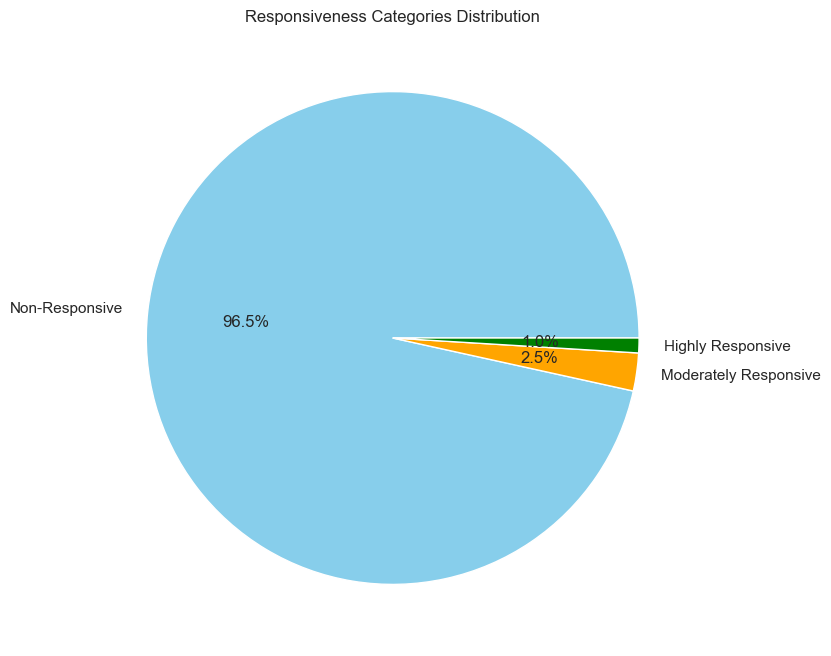

C:\Users\milto\AppData\Local\Temp\ipykernel_14408\2603746575.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='Set2')


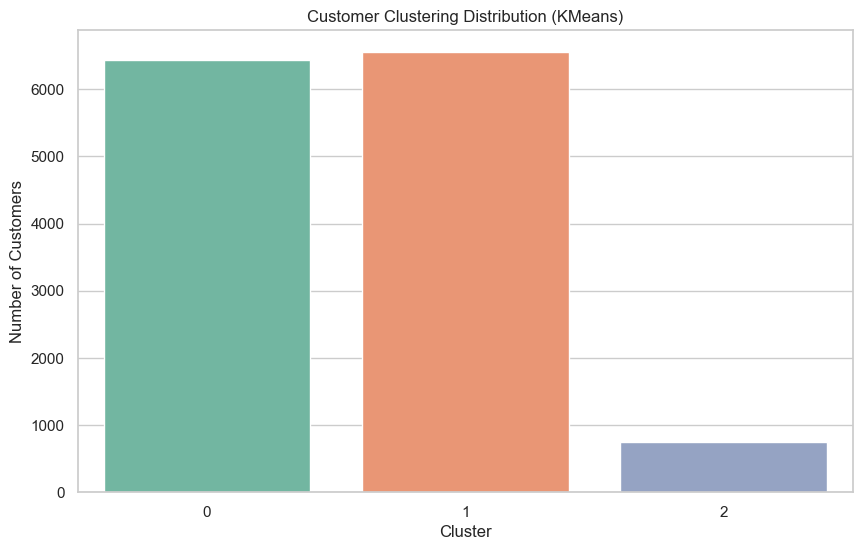

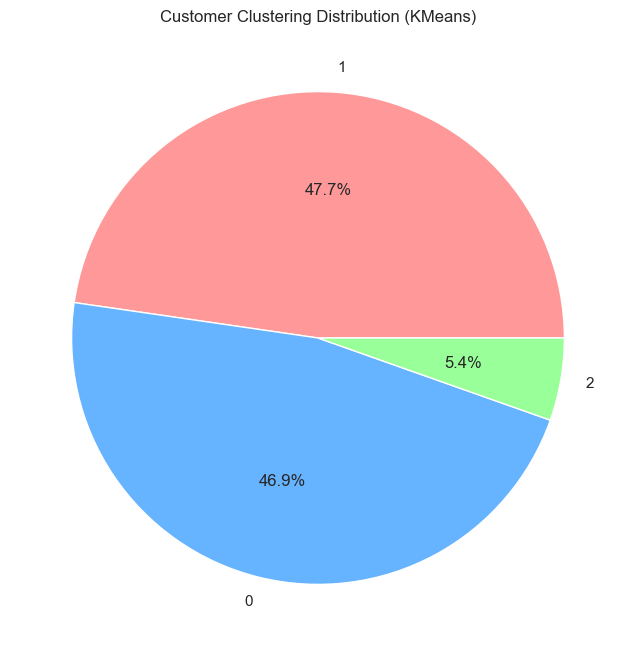

C:\Users\milto\AppData\Local\Temp\ipykernel_14408\2603746575.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Segment', data=df, palette='Blues')


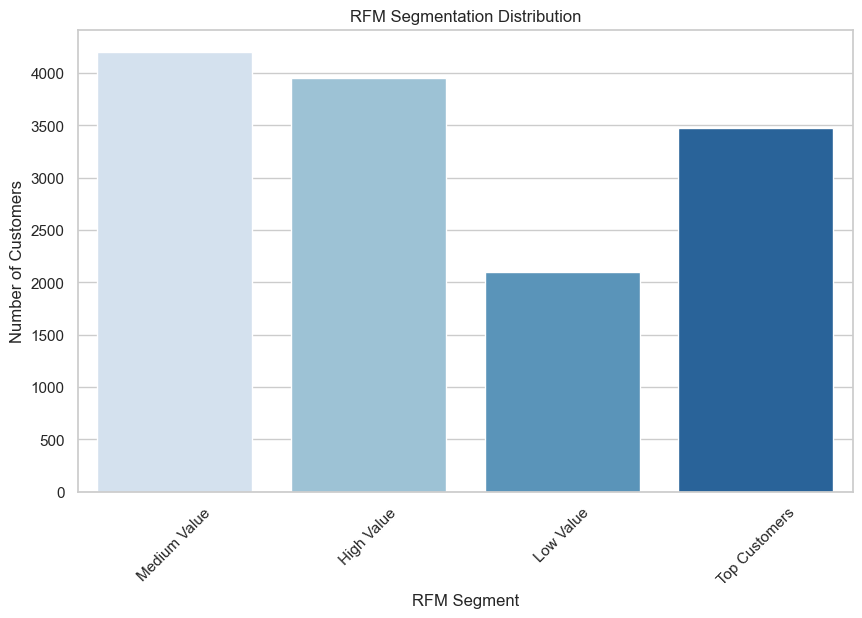

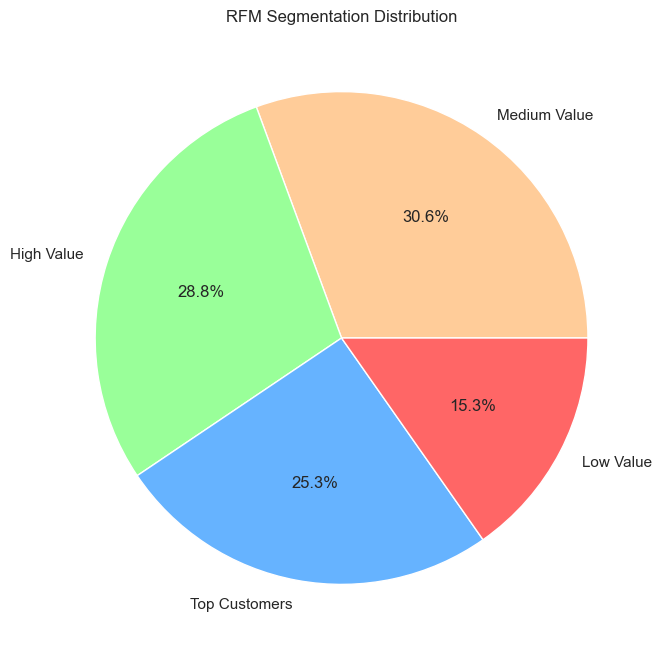

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'rfm_df' contains the RFM segments and is ready for merging

# Step 1: Merge RFM Segments with the Main DataFrame
if 'RFM_Segment' not in df.columns:
    try:
        # Merging 'RFM_Segment' back into the main DataFrame
        df = df.merge(rfm_df[['id', 'RFM_Segment']], on='id', how='left')
        print("Successfully merged RFM segments.")
    except Exception as e:
        print(f"Error while merging RFM segments: {e}")

# Step 2: Verify that 'RFM_Segment' is in df
print("\nColumns in DataFrame after merging:")
print(df.columns)

# Proceed with visualizations if 'RFM_Segment' is present
if 'RFM_Segment' in df.columns:

    ### Step 1.1: Visualize Segmentation Results ###

    # Step 1.1.1: Bar Plot for Responsiveness Categories
    plt.figure(figsize=(10, 6))
    sns.countplot(x='responsiveness_category', data=df, palette='viridis')
    plt.title('Responsiveness Categories Distribution')
    plt.xlabel('Responsiveness Category')
    plt.ylabel('Number of Customers')
    plt.show()

    # Step 1.1.2: Pie Chart for Responsiveness Categories
    plt.figure(figsize=(8, 8))
    df['responsiveness_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
    plt.title('Responsiveness Categories Distribution')
    plt.ylabel('')
    plt.show()

    # Step 1.1.3: Bar Plot for KMeans Clustering
    plt.figure(figsize=(10, 6))
    sns.countplot(x='cluster', data=df, palette='Set2')
    plt.title('Customer Clustering Distribution (KMeans)')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()

    # Step 1.1.4: Pie Chart for KMeans Clustering
    plt.figure(figsize=(8, 8))
    df['cluster'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
    plt.title('Customer Clustering Distribution (KMeans)')
    plt.ylabel('')
    plt.show()

    # Step 1.1.5: Bar Plot for RFM Segmentation
    plt.figure(figsize=(10, 6))
    sns.countplot(x='RFM_Segment', data=df, palette='Blues')
    plt.title('RFM Segmentation Distribution')
    plt.xlabel('RFM Segment')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()

    # Step 1.1.6: Pie Chart for RFM Segmentation
    plt.figure(figsize=(8, 8))
    df['RFM_Segment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ffcc99', '#99ff99', '#66b3ff', '#ff6666'])
    plt.title('RFM Segmentation Distribution')
    plt.ylabel('')
    plt.show()
else:
    print("\nRFM_Segment column is still not present in the DataFrame.")


Comparison between Responsiveness Categories and RFM Segments:
RFM_Segment              High Value  Low Value  Medium Value  Top Customers
responsiveness_category                                                    
Highly Responsive                27         12            38             56
Moderately Responsive            57         35           112            137
Non-Responsive                 3872       2049          4055           3281


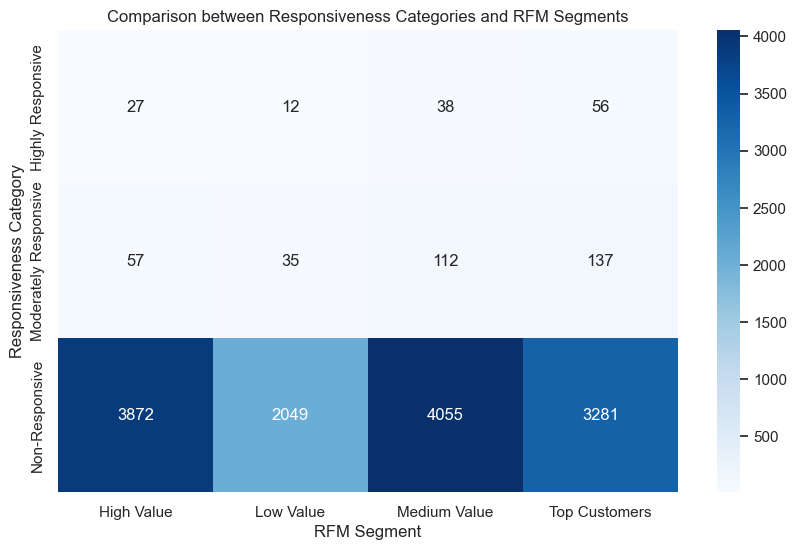


Percentage of Highly Responsive Customers in Top Customers Segment: 42.11%

Comparison between KMeans Clusters and Responsiveness Categories:
responsiveness_category  Highly Responsive  Moderately Responsive  \
cluster                                                             
0                                      120                    107   
1                                        0                    199   
2                                       13                     35   

responsiveness_category  Non-Responsive  
cluster                                  
0                                  6211  
1                                  6351  
2                                   695  


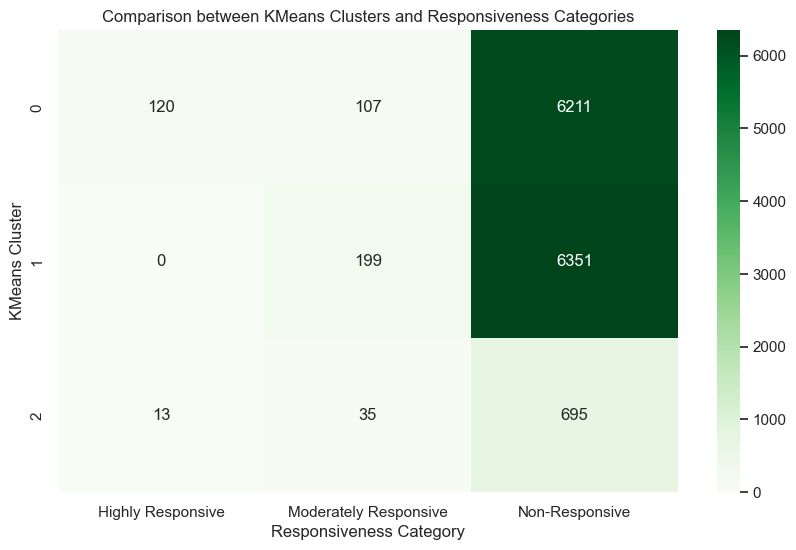

In [31]:
# Compare Segmentation Methods

### Step 2: Compare Segmentation Methods ###

# Step 2.1: Compare Responsiveness Categories with RFM Segments
# Crosstab to compare Highly Responsive vs. Top Customers
comparison_table = pd.crosstab(df['responsiveness_category'], df['RFM_Segment'])
print("\nComparison between Responsiveness Categories and RFM Segments:")
print(comparison_table)

# Heatmap to visualize comparison between Responsiveness Categories and RFM Segments
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_table, annot=True, fmt="d", cmap="Blues")
plt.title('Comparison between Responsiveness Categories and RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Responsiveness Category')
plt.show()

# Step 2.2: Check if Highly Responsive Customers are Mostly in Top Customers Segment
highly_responsive_in_top_customers = df[(df['responsiveness_category'] == 'Highly Responsive') & (df['RFM_Segment'] == 'Top Customers')].shape[0]
total_highly_responsive = df[df['responsiveness_category'] == 'Highly Responsive'].shape[0]

# Calculate percentage of Highly Responsive customers in Top Customers
percentage_highly_responsive_in_top_customers = (highly_responsive_in_top_customers / total_highly_responsive) * 100 if total_highly_responsive > 0 else 0
print(f"\nPercentage of Highly Responsive Customers in Top Customers Segment: {percentage_highly_responsive_in_top_customers:.2f}%")

# Step 2.3: Compare Clustering with Responsiveness
# Crosstab to compare KMeans Clusters with Responsiveness Categories
comparison_cluster_responsive = pd.crosstab(df['cluster'], df['responsiveness_category'])
print("\nComparison between KMeans Clusters and Responsiveness Categories:")
print(comparison_cluster_responsive)

# Heatmap to visualize comparison between KMeans Clusters and Responsiveness Categories
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_cluster_responsive, annot=True, fmt="d", cmap="Greens")
plt.title('Comparison between KMeans Clusters and Responsiveness Categories')
plt.xlabel('Responsiveness Category')
plt.ylabel('KMeans Cluster')
plt.show()

In [ ]:
#  Predictive Analysis

In [33]:
# Prepare Dataset and Train Models

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the dataset with cleaned and feature-engineered data

# Step 7.1.1: Define Features and Target
# Selecting relevant features based on our understanding of the dataset
features = ['age', 'gender', 'education', 'job', 'accountBalance', 'numberOfContacts',
            'total_spent', 'interaction_frequency', 'promotion_cost', 'advertisement_cost',
            'discount_cost', 'daySinceLastCampaign', 'recency', 'frequency', 'monetary']
target = 'converted'

# Step 7.1.2: Prepare the feature set (X) and target set (y)
X = df[features]
y = df[target]

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 7.1.3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7.1.4: Train Models
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)


Feature Importance from Random Forest:
                      Feature  Importance
8        daySinceLastCampaign    0.268051
9                     recency    0.098412
0                         age    0.068192
1              accountBalance    0.064303
3                 total_spent    0.063296
6          advertisement_cost    0.062183
11                   monetary    0.060548
5              promotion_cost    0.058194
7               discount_cost    0.056439
2            numberOfContacts    0.047048
4       interaction_frequency    0.040122
10                  frequency    0.038674
12                gender_male    0.010420
14     education_uniGraduated    0.010386
23              job_technical    0.008408
18                job_manager    0.007562
26                 job_worker    0.005420
13  education_secondarySchool    0.005097
22                job_student    0.004860
21               job_services    0.004417
24             job_unemployed    0.004392
20           job_selfEmployed    0.0

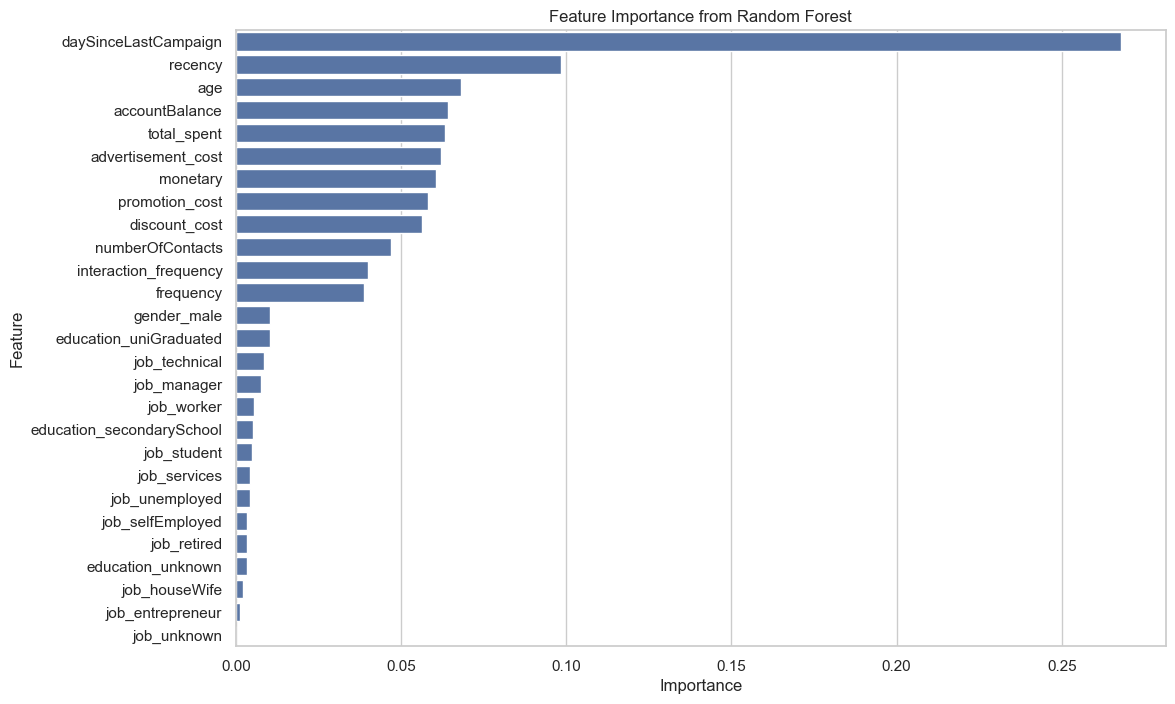

In [35]:
# Step 7.2.1: Feature Importance from Random Forest
importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance from Random Forest:")
print(feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# Step 7.2.2: Remove Less Significant Features
# We'll drop features with very low importance (< 0.01)
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Step 7.3.1: Retrain Models with Selected Features
# Random Forest Classifier after Feature Selection
rf_clf_selected = RandomForestClassifier(random_state=42)
rf_clf_selected.fit(X_train_selected, y_train)

# Step 7.3.2: Evaluate Models
# Predict on the Test Set
y_pred_rf = rf_clf_selected.predict(X_test_selected)

# Metrics for Random Forest Model
print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_clf_selected.predict_proba(X_test_selected)[:, 1]):.2f}")

# Step 7.3.3: Hyperparameter Tuning Using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_clf_selected, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_search.fit(X_train_selected, y_train)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate best estimator from GridSearchCV
best_rf_clf = grid_search.best_estimator_
y_pred_best_rf = best_rf_clf.predict(X_test_selected)

print("\nBest Random Forest Classifier Metrics After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_rf):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, best_rf_clf.predict_proba(X_test_selected)[:, 1]):.2f}")


Random Forest Classifier Metrics:
Accuracy: 0.97
Precision: 0.39
Recall: 0.12
F1 Score: 0.18
ROC-AUC Score: 0.97
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Parameters from GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Best Random Forest Classifier Metrics After Hyperparameter Tuning:
Accuracy: 0.97
Precision: 0.40
Recall: 0.05
F1 Score: 0.09
ROC-AUC Score: 0.96


In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Step 7.4.1: Address Class Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

# Step 7.4.2: Retrain Random Forest Model Using Balanced Data
rf_clf_balanced = RandomForestClassifier(random_state=42, **grid_search.best_params_)
rf_clf_balanced.fit(X_train_balanced, y_train_balanced)

# Step 7.4.3: Evaluate the Balanced Model
y_pred_balanced = rf_clf_balanced.predict(X_test_selected)

print("\nRandom Forest Classifier Metrics After Balancing Classes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_balanced):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_balanced):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_balanced):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_clf_balanced.predict_proba(X_test_selected)[:, 1]):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))


Random Forest Classifier Metrics After Balancing Classes:
Accuracy: 0.92
Precision: 0.23
Recall: 0.81
F1 Score: 0.36
ROC-AUC Score: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4000
           1       0.23      0.81      0.36       120

    accuracy                           0.92      4120
   macro avg       0.61      0.86      0.66      4120
weighted avg       0.97      0.92      0.94      4120



In [41]:
# Compare the Random Forest model before and after balancing
print("\nComparison of Random Forest Model Metrics Before and After Balancing:")
print("Before Balancing:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_rf):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, best_rf_clf.predict_proba(X_test_selected)[:, 1]):.2f}")

print("\nAfter Balancing with SMOTE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_balanced):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_balanced):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_balanced):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_clf_balanced.predict_proba(X_test_selected)[:, 1]):.2f}")


Comparison of Random Forest Model Metrics Before and After Balancing:
Before Balancing:
Accuracy: 0.97
Precision: 0.40
Recall: 0.05
F1 Score: 0.09
ROC-AUC Score: 0.96

After Balancing with SMOTE:
Accuracy: 0.92
Precision: 0.23
Recall: 0.81
F1 Score: 0.36
ROC-AUC Score: 0.96


In [79]:
import shap

# Initialize the SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_clf_balanced)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_selected)

# Determine if the model is binary classification or multi-class based on `shap_values`
if isinstance(shap_values, list):
    print("Detected multi-class classification.")
    class_index = 1  # Choose a class index (e.g., 1 for class 1)
    shap_values_to_use = shap_values[class_index]
    expected_value_to_use = explainer.expected_value[class_index]
else:
    print("Detected binary classification.")
    shap_values_to_use = shap_values
    expected_value_to_use = explainer.expected_value

# Extract SHAP values and features for the first instance
shap_values_single_instance = shap_values_to_use[0]  # SHAP values for the first instance
features_single_instance = X_test_selected.iloc[0].values  # Convert to a numpy array (1D)

# Use feature names derived directly from the test set
feature_names = list(X_test_selected.columns)

# Generate the decision plot
try:
    shap.decision_plot(
        base_value=expected_value_to_use,          # Base value (scalar)
        shap_values=shap_values_single_instance,   # SHAP values for the first instance (1D array)
        features=features_single_instance,         # Features as a numpy array (1D)
        feature_names=feature_names                # Correct list of feature names
    )
except ValueError as ve:
    print(f"ValueError: {ve}")
    print("Please check the alignment between feature names, SHAP values, and features.")

Detected binary classification.
ValueError: The feature_names arg must include all features represented in shap_values.
Please check the alignment between feature names, SHAP values, and features.


In [83]:
# A/B Testing Implementation
# Step 1: A/B Test Setup - Split Dataset into Control and Treatment Groups

import numpy as np

# Step 1.1: Split the dataset into control and treatment groups randomly
np.random.seed(42)  # For reproducibility
df['group'] = np.random.choice(['control', 'treatment'], size=len(df), replace=True)

# Verify the distribution of the groups
group_counts = df['group'].value_counts()
print("\nDistribution of Customers in Control vs Treatment Groups:\n", group_counts)


Distribution of Customers in Control vs Treatment Groups:
 group
treatment    6871
control      6860
Name: count, dtype: int64


In [85]:
# Step 2.1: Apply intervention - Increase discount for the treatment group
# Assume 'discount_cost' represents the discount amount, we'll double it for the treatment group
df['adjusted_discount_cost'] = df.apply(lambda row: row['discount_cost'] * 2 if row['group'] == 'treatment' else row['discount_cost'], axis=1)

# Step 2.2: Calculate the adjusted total campaign spend
df['adjusted_total_campaign_spend'] = df['promotion_cost'] + df['advertisement_cost'] + df['adjusted_discount_cost']

In [87]:
# Step 3.1: Calculate Conversion Rates for Control and Treatment Groups
conversion_rate_by_group = df.groupby('group')['converted'].mean() * 100
print("\nConversion Rate by Group (%):\n", conversion_rate_by_group)

# Step 3.2: Calculate Total Revenue for Control and Treatment Groups
total_revenue_by_group = df.groupby('group')['total_spent'].sum()
print("\nTotal Revenue by Group:\n", total_revenue_by_group)

# Step 3.3: Calculate Average Spend per Customer by Group
average_spend_by_group = df.groupby('group')['total_spent'].mean()
print("\nAverage Spend per Customer by Group:\n", average_spend_by_group)


Conversion Rate by Group (%):
 group
control      3.279883
treatment    3.623927
Name: converted, dtype: float64

Total Revenue by Group:
 group
control      34511424
treatment    34630901
Name: total_spent, dtype: int32

Average Spend per Customer by Group:
 group
control      5030.819825
treatment    5040.154417
Name: total_spent, dtype: float64


In [89]:
from scipy.stats import ttest_ind, chi2_contingency

# Step 4.1: T-test for Average Revenue between Control and Treatment Groups
control_group_revenue = df[df['group'] == 'control']['total_spent']
treatment_group_revenue = df[df['group'] == 'treatment']['total_spent']

# Perform the t-test
t_stat, p_value = ttest_ind(control_group_revenue, treatment_group_revenue)
print(f"\nT-test for Average Revenue between Control and Treatment:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation of p-value
if p_value < 0.05:
    print("The difference in average revenue between control and treatment is statistically significant.")
else:
    print("No statistically significant difference in average revenue between control and treatment.")

# Step 4.2: Chi-square test for Conversion Rate between Control and Treatment Groups
control_conversions = df[df['group'] == 'control']['converted'].sum()
control_non_conversions = len(df[df['group'] == 'control']) - control_conversions

treatment_conversions = df[df['group'] == 'treatment']['converted'].sum()
treatment_non_conversions = len(df[df['group'] == 'treatment']) - treatment_conversions

# Construct the contingency table
contingency_table = [
    [control_conversions, control_non_conversions],
    [treatment_conversions, treatment_non_conversions]
]

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"\nChi-square Test for Conversion Rate between Control and Treatment:")
print(f"Chi-square Statistic: {chi2}, P-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("The difference in conversion rate between control and treatment is statistically significant.")
else:
    print("No statistically significant difference in conversion rate between control and treatment.")


T-test for Average Revenue between Control and Treatment:
T-statistic: -0.19088464782362882, P-value: 0.8486187908090914
No statistically significant difference in average revenue between control and treatment.

Chi-square Test for Conversion Rate between Control and Treatment:
Chi-square Statistic: 1.1180844820187978, P-value: 0.29033128865752283
No statistically significant difference in conversion rate between control and treatment.


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\4067462815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_by_group.index, y=conversion_rate_by_group.values, palette='viridis')


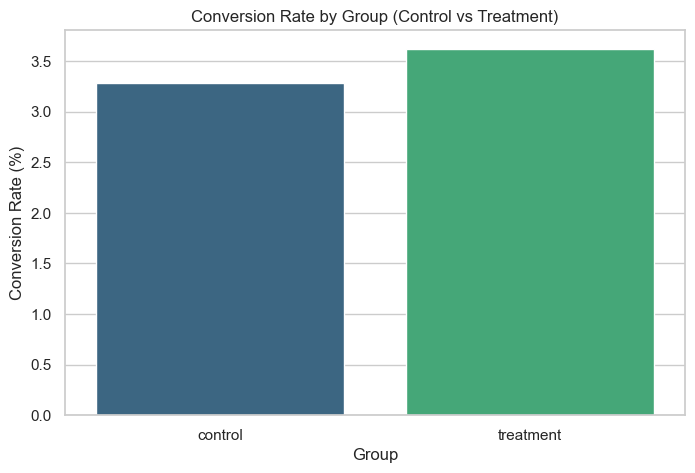

C:\Users\milto\AppData\Local\Temp\ipykernel_14408\4067462815.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_revenue_by_group.index, y=total_revenue_by_group.values, palette='Blues')


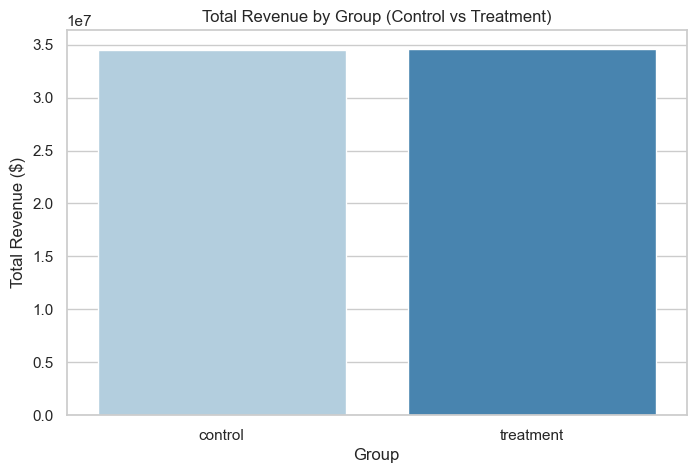

C:\Users\milto\AppData\Local\Temp\ipykernel_14408\4067462815.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_spend_by_group.index, y=average_spend_by_group.values, palette='Greens')


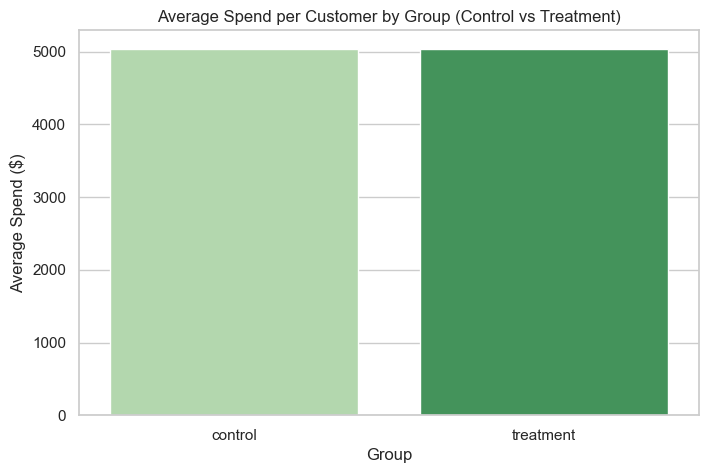

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5.1: Plot Conversion Rate by Group
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_rate_by_group.index, y=conversion_rate_by_group.values, palette='viridis')
plt.title('Conversion Rate by Group (Control vs Treatment)')
plt.xlabel('Group')
plt.ylabel('Conversion Rate (%)')
plt.show()

# Step 5.2: Plot Total Revenue by Group
plt.figure(figsize=(8, 5))
sns.barplot(x=total_revenue_by_group.index, y=total_revenue_by_group.values, palette='Blues')
plt.title('Total Revenue by Group (Control vs Treatment)')
plt.xlabel('Group')
plt.ylabel('Total Revenue ($)')
plt.show()

# Step 5.3: Plot Average Spend per Customer by Group
plt.figure(figsize=(8, 5))
sns.barplot(x=average_spend_by_group.index, y=average_spend_by_group.values, palette='Greens')
plt.title('Average Spend per Customer by Group (Control vs Treatment)')
plt.xlabel('Group')
plt.ylabel('Average Spend ($)')
plt.show()

In [ ]:
# Campaign Performance Analysis

C:\Users\milto\AppData\Local\Temp\ipykernel_14408\1039066137.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_age_group = df.groupby('age_group')['converted'].mean() * 100
C:\Users\milto\AppData\Local\Temp\ipykernel_14408\1039066137.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_age_group.index, y=conversion_rate_age_group.values, palette='muted')



Conversion Rate by Age Group (%):
 age_group
18-24     6.091371
25-34     3.659827
35-49     2.632035
50-64     3.415196
65+      15.555556
Name: converted, dtype: float64


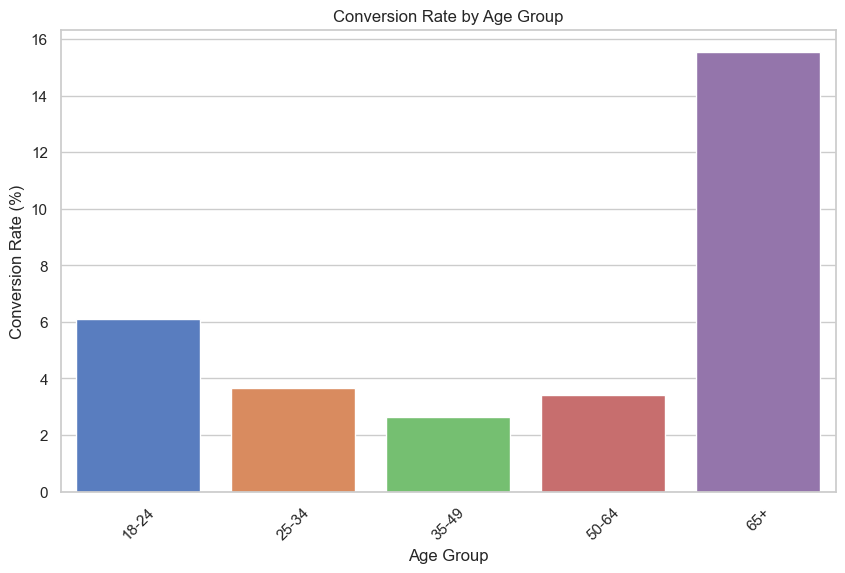


Conversion Rate by Job Type (%):
 job
administrative     3.951562
entrepreneur       0.655022
houseWife          3.108808
manager            4.364005
retired            6.790123
selfEmployed       4.496788
services           2.028081
student           10.238908
technical          3.402563
unemployed         6.020942
unknown            0.000000
worker             1.592680
Name: converted, dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\1039066137.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_job.index, y=conversion_rate_job.values, palette='Blues')


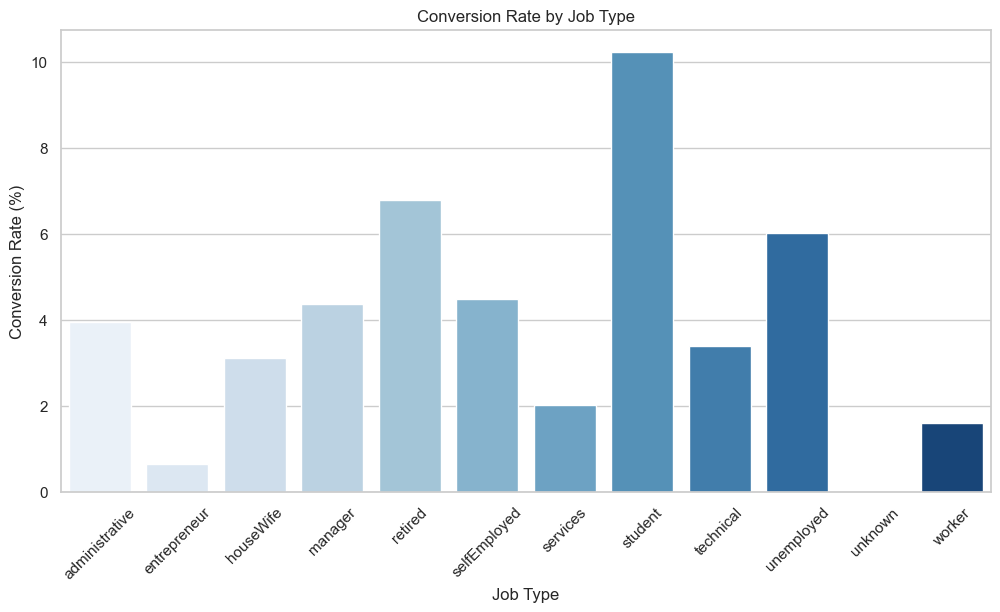


Conversion Rate by RFM Segment (%):
 RFM_Segment
High Value       2.123357
Low Value        2.242366
Medium Value     3.567182
Top Customers    5.555556
Name: converted, dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\1039066137.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_rfm.index, y=conversion_rate_rfm.values, palette='viridis')


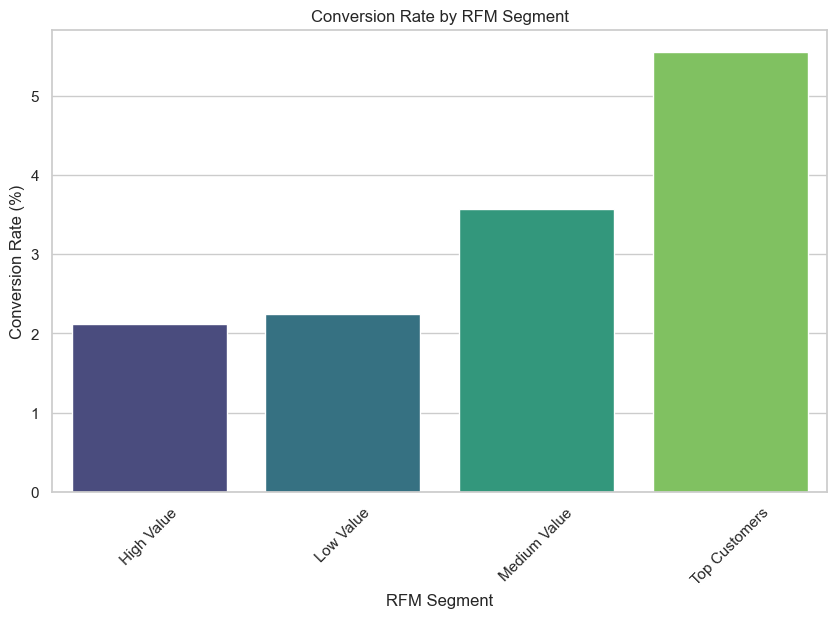


Conversion Rate by Cluster (%):
 cluster
0    3.525940
1    3.038168
2    6.460296
Name: converted, dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\1039066137.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_cluster.index, y=conversion_rate_cluster.values, palette='Set2')


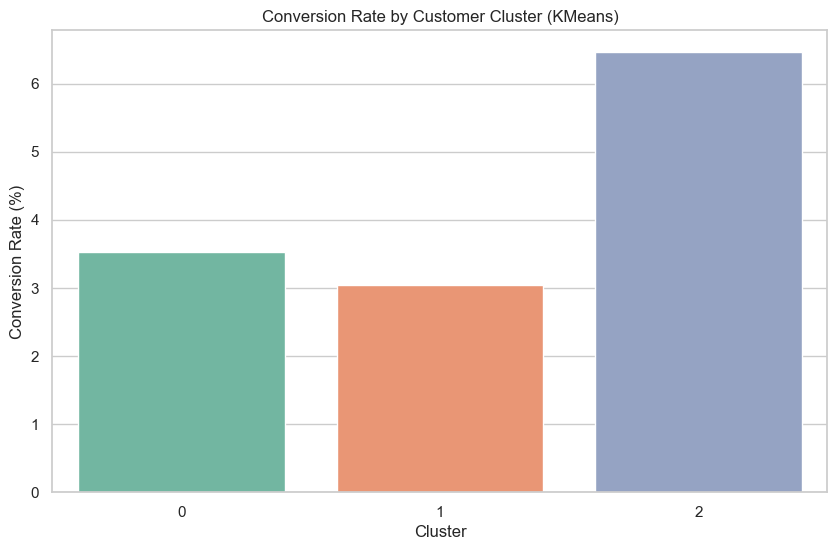

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1.1.1: Conversion Rate by Age Group
conversion_rate_age_group = df.groupby('age_group')['converted'].mean() * 100
print("\nConversion Rate by Age Group (%):\n", conversion_rate_age_group)

plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rate_age_group.index, y=conversion_rate_age_group.values, palette='muted')
plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Step 1.1.2: Conversion Rate by Job Type
conversion_rate_job = df.groupby('job')['converted'].mean() * 100
print("\nConversion Rate by Job Type (%):\n", conversion_rate_job)

plt.figure(figsize=(12, 6))
sns.barplot(x=conversion_rate_job.index, y=conversion_rate_job.values, palette='Blues')
plt.title('Conversion Rate by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Step 1.1.3: Conversion Rate by RFM Segment
conversion_rate_rfm = df.groupby('RFM_Segment')['converted'].mean() * 100
print("\nConversion Rate by RFM Segment (%):\n", conversion_rate_rfm)

plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rate_rfm.index, y=conversion_rate_rfm.values, palette='viridis')
plt.title('Conversion Rate by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Step 1.1.4: Conversion Rate by KMeans Cluster
conversion_rate_cluster = df.groupby('cluster')['converted'].mean() * 100
print("\nConversion Rate by Cluster (%):\n", conversion_rate_cluster)

plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rate_cluster.index, y=conversion_rate_cluster.values, palette='Set2')
plt.title('Conversion Rate by Customer Cluster (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Conversion Rate (%)')
plt.show()


Average Discount Cost by Conversion Status ($):
 converted
0    163.876292
1    165.495781
Name: adjusted_discount_cost, dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\4136520848.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount_conversion.index, y=avg_discount_conversion.values, palette='Reds')


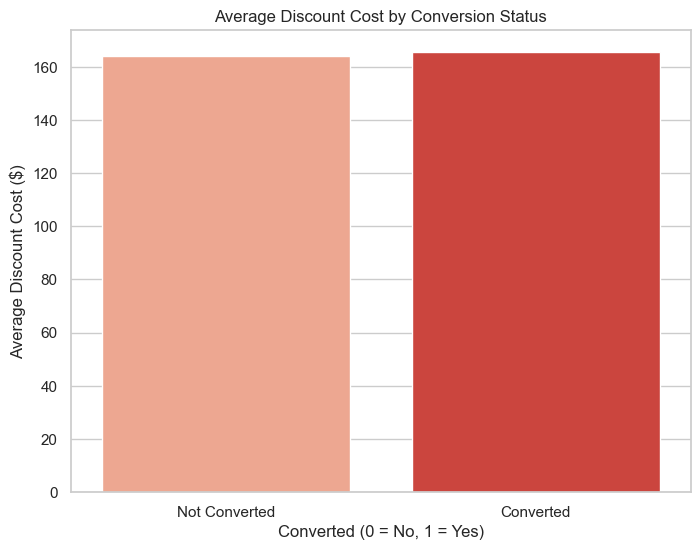


Average Campaign Spend by Conversion Status ($):
 converted
0    990.769254
1    991.751055
Name: adjusted_total_campaign_spend, dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\4136520848.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_campaign_spend_conversion.index, y=avg_campaign_spend_conversion.values, palette='Greens')


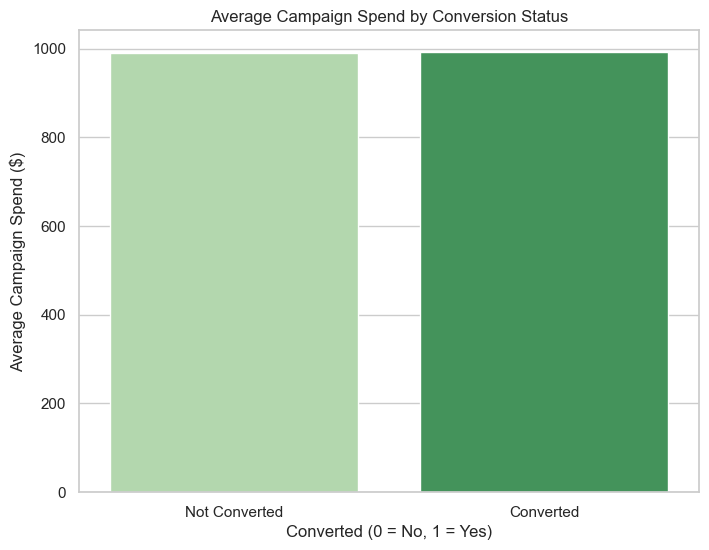

In [95]:
# Step 1.2.1: Average Discount for Converted and Not Converted Customers
avg_discount_conversion = df.groupby('converted')['adjusted_discount_cost'].mean()
print("\nAverage Discount Cost by Conversion Status ($):\n", avg_discount_conversion)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_discount_conversion.index, y=avg_discount_conversion.values, palette='Reds')
plt.title('Average Discount Cost by Conversion Status')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Average Discount Cost ($)')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.show()

# Step 1.2.2: Offer Effectiveness by Campaign Spend
avg_campaign_spend_conversion = df.groupby('converted')['adjusted_total_campaign_spend'].mean()
print("\nAverage Campaign Spend by Conversion Status ($):\n", avg_campaign_spend_conversion)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_campaign_spend_conversion.index, y=avg_campaign_spend_conversion.values, palette='Greens')
plt.title('Average Campaign Spend by Conversion Status')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('Average Campaign Spend ($)')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.show()


Conversion Rate by Weekday (%):
 campaign_weekday
Friday        3.860570
Monday        0.060496
Saturday      3.283174
Sunday        1.709726
Thursday      3.581841
Tuesday      25.568182
Wednesday     7.674236
Name: converted, dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\3760787445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_weekday.index, y=conversion_rate_weekday.values, palette='coolwarm')


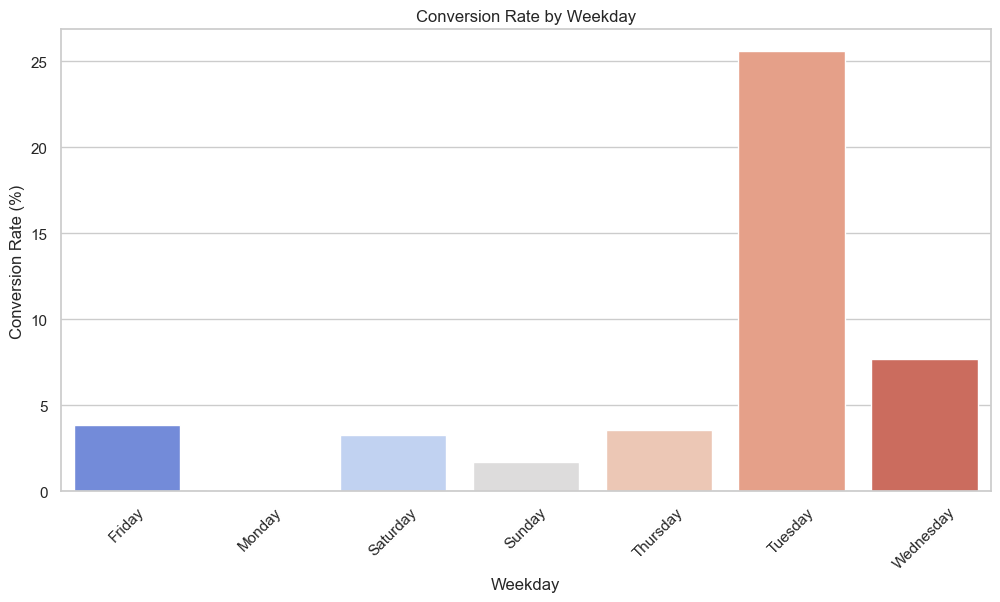


Conversion Rate: Weekday vs Weekend (%):
 weekend_flag
Weekday    4.073394
Weekend    2.537797
Name: converted, dtype: float64


C:\Users\milto\AppData\Local\Temp\ipykernel_14408\3760787445.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_weekend.index, y=conversion_rate_weekend.values, palette='autumn')


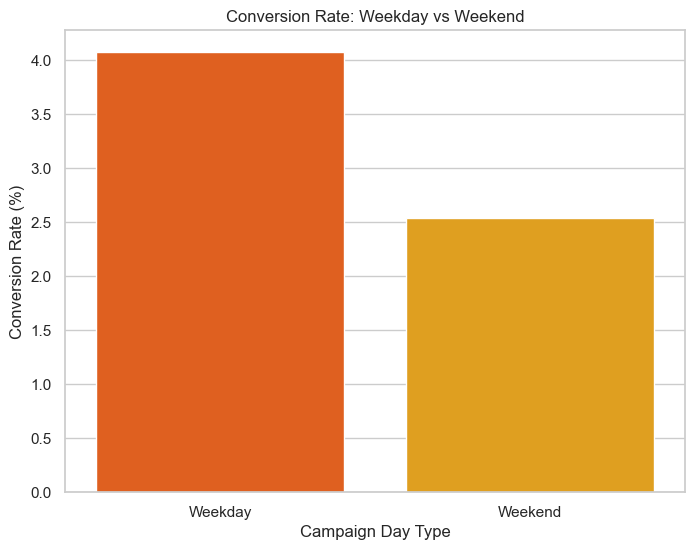

In [97]:
# Step 2.1.1: Extract Weekday Information from Campaign Date
df['campaign_weekday'] = df['campaign_date'].dt.day_name()

# Step 2.1.2: Check Conversion Rate by Weekday
conversion_rate_weekday = df.groupby('campaign_weekday')['converted'].mean() * 100
print("\nConversion Rate by Weekday (%):\n", conversion_rate_weekday)

plt.figure(figsize=(12, 6))
sns.barplot(x=conversion_rate_weekday.index, y=conversion_rate_weekday.values, palette='coolwarm')
plt.title('Conversion Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Step 2.1.3: Weekday vs. Weekend Conversion Analysis
# Create a column that distinguishes between weekends and weekdays
df['weekend_flag'] = df['campaign_weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Calculate conversion rate for Weekday vs. Weekend
conversion_rate_weekend = df.groupby('weekend_flag')['converted'].mean() * 100
print("\nConversion Rate: Weekday vs Weekend (%):\n", conversion_rate_weekend)

plt.figure(figsize=(8, 6))
sns.barplot(x=conversion_rate_weekend.index, y=conversion_rate_weekend.values, palette='autumn')
plt.title('Conversion Rate: Weekday vs Weekend')
plt.xlabel('Campaign Day Type')
plt.ylabel('Conversion Rate (%)')
plt.show()